In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod, GreenwellMethod, SejongOhMethod
from artemis.interactions_methods.model_specific import ConditionalMinimalDepthMethod, SplitScoreMethod
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
model = RandomForestRegressor(n_estimators=80, max_depth=12).fit(X, y)

### Greenwell Method

In [5]:
vint = GreenwellMethod()
vint.fit(model, X, 50, show_progress=True) 

Calculating variable importance: 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]


In [6]:
vint.ovo

,Feature 1,Feature 2,Greenwell Variable Interaction Measure
0,MedInc,AveOccup,0.116285
1,HouseAge,AveOccup,0.106770
2,Latitude,Longitude,0.106483
3,MedInc,Latitude,0.104130
4,MedInc,Longitude,0.067580
5,MedInc,HouseAge,0.056699
6,AveOccup,Latitude,0.050550
7,AveOccup,Longitude,0.047094
8,MedInc,AveRooms,0.043304
9,AveRooms,Latitude,0.027525


In [7]:
vint.variable_importance

,Feature,Value
0,MedInc,0.652095
1,Latitude,0.371132
2,Longitude,0.312923
3,AveOccup,0.273020
4,HouseAge,0.099208
5,AveRooms,0.049627
6,AveBedrms,0.034498
7,Population,0.022115


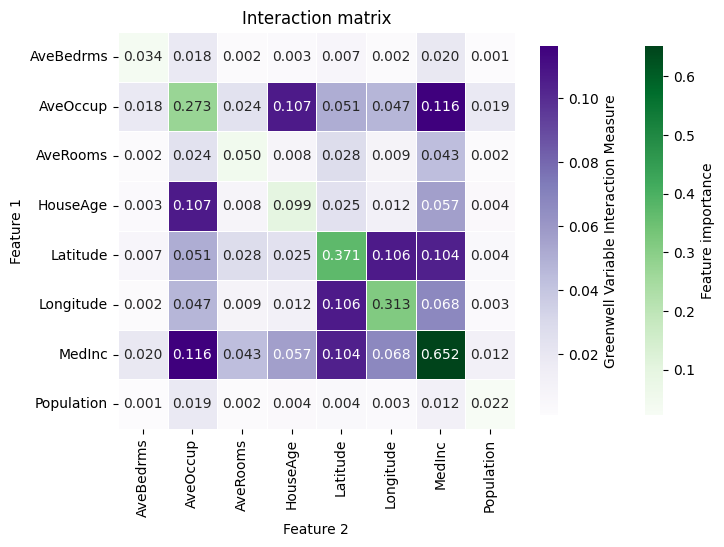

In [8]:
vint.plot(figsize=(8, 6)) 

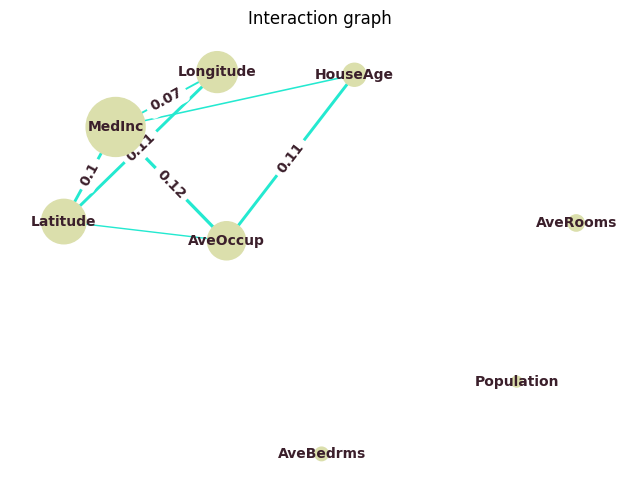

In [9]:
vint.plot("graph")  

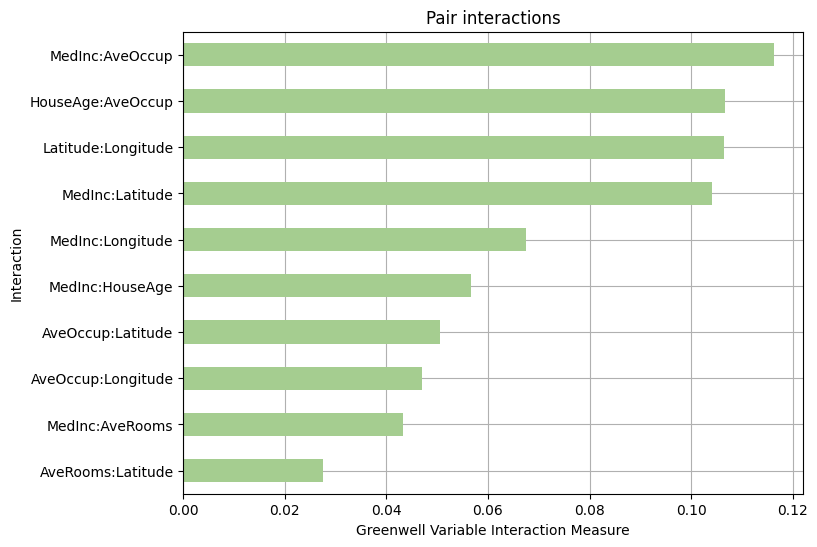

In [10]:
vint.plot("bar_chart")

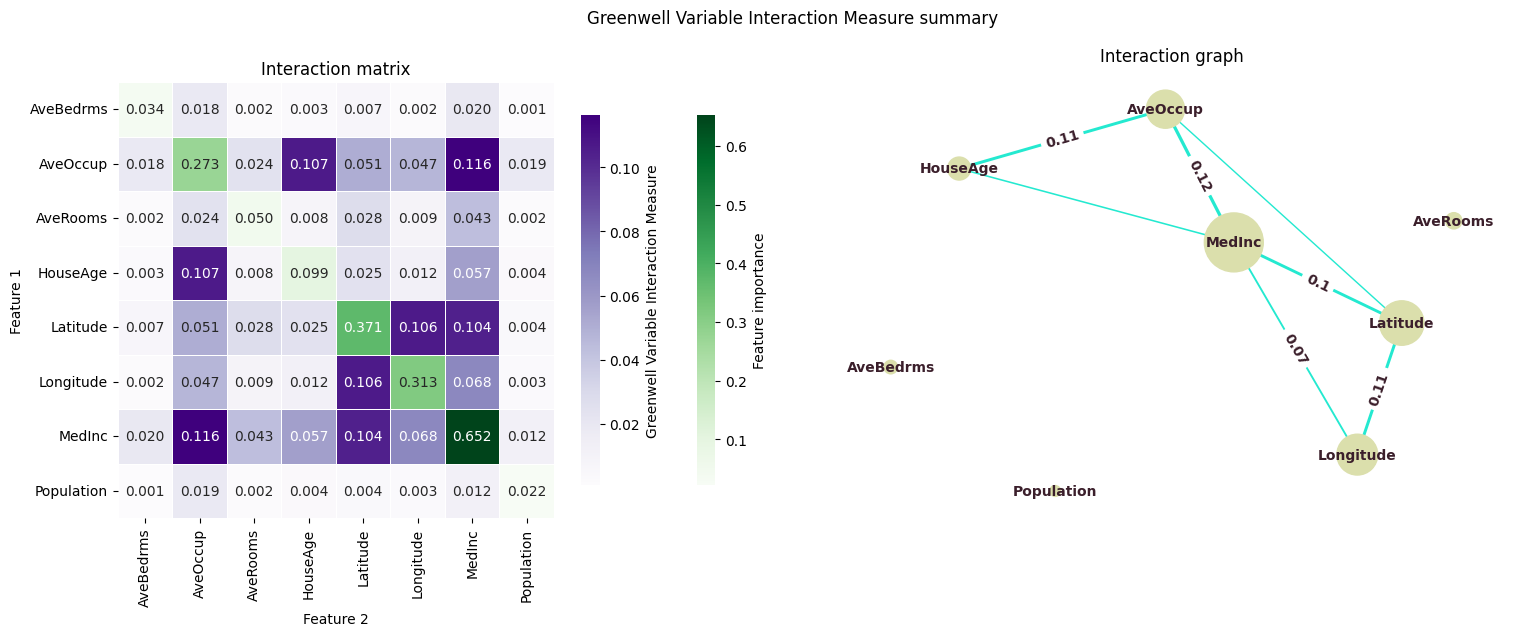

In [11]:
vint.plot("summary")

In [12]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features 

Calculating variable importance: 100%|██████████| 3/3 [00:00<00:00, 68.49it/s]


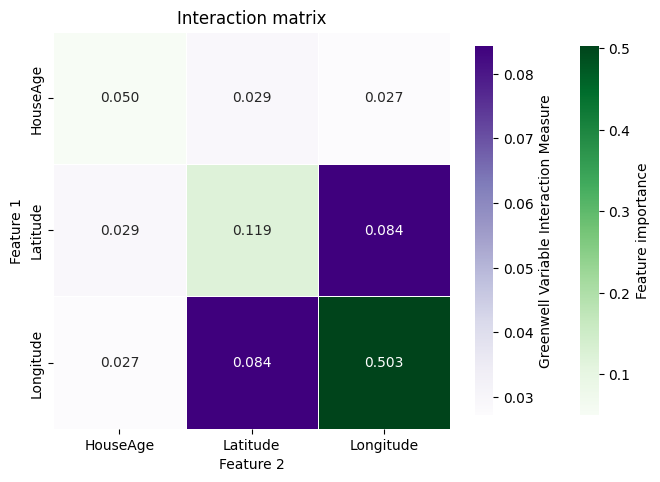

In [13]:
vint_subset.plot()

### H statistic

In [14]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 100, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


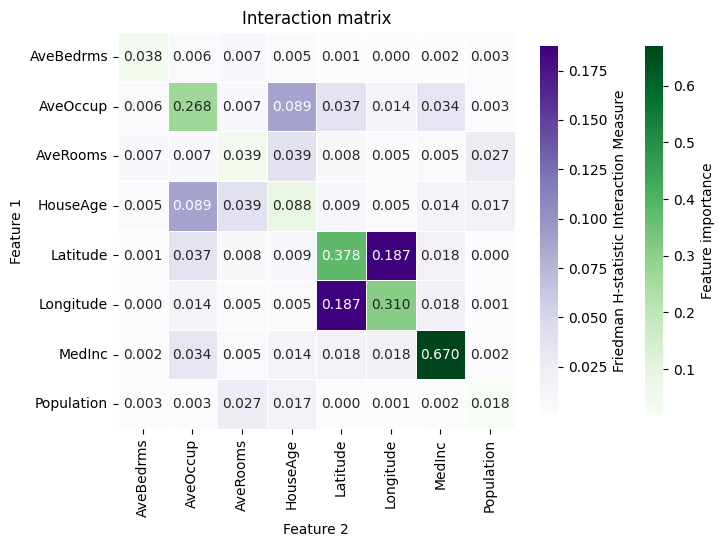

In [15]:
h_stat.plot()

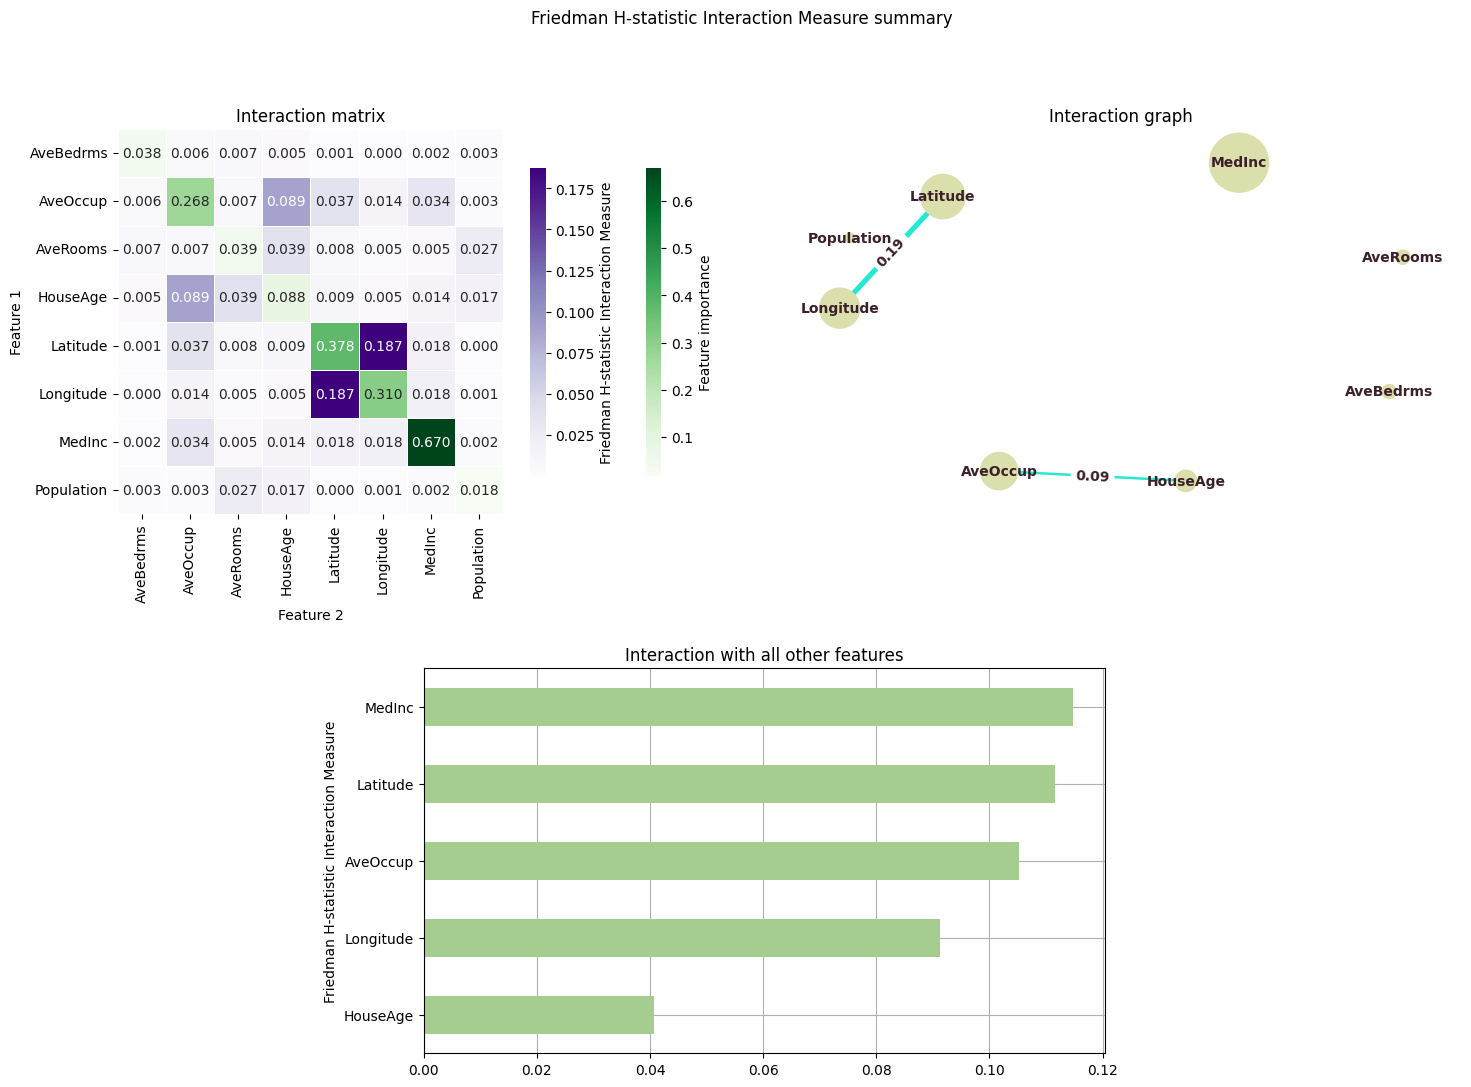

In [16]:
h_stat.plot("summary")  

In [17]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 3/3 [00:00<00:00, 20.41it/s]


### Sejong Oh Method

In [18]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 100, show_progress=True)  # all features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 37.00it/s]


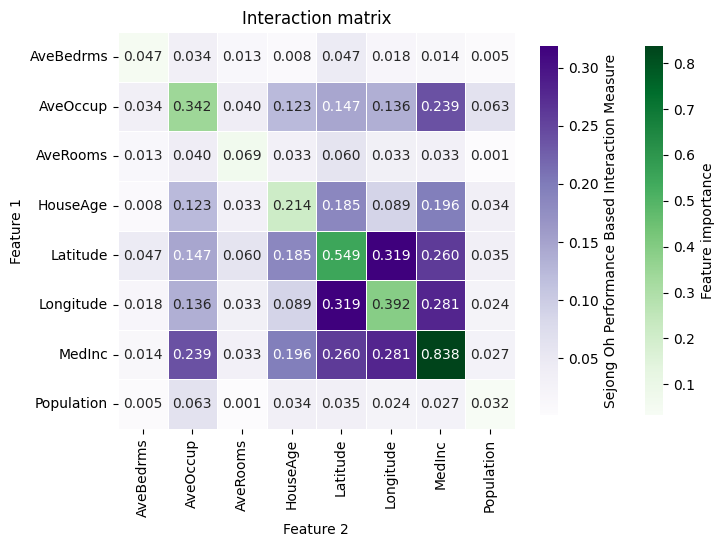

In [19]:
perf_based.plot() 

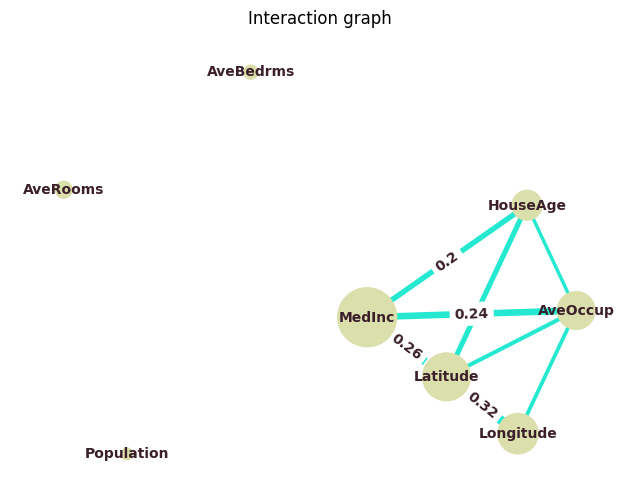

In [20]:
perf_based.plot("graph")  # interaction graph - SejongOhInteraction

In [21]:
perf_based_subset = SejongOhMethod()
perf_based_subset.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 41.61it/s]


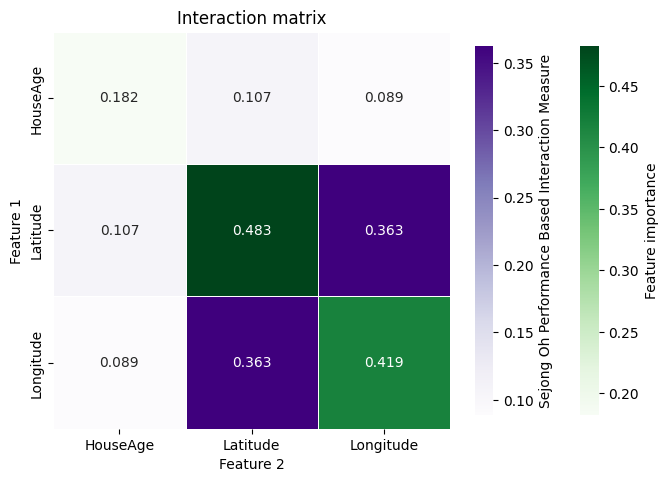

In [22]:
perf_based_subset.plot()

### Comparator

In [23]:
from artemis.comparision import FeatureInteractionMethodComparator

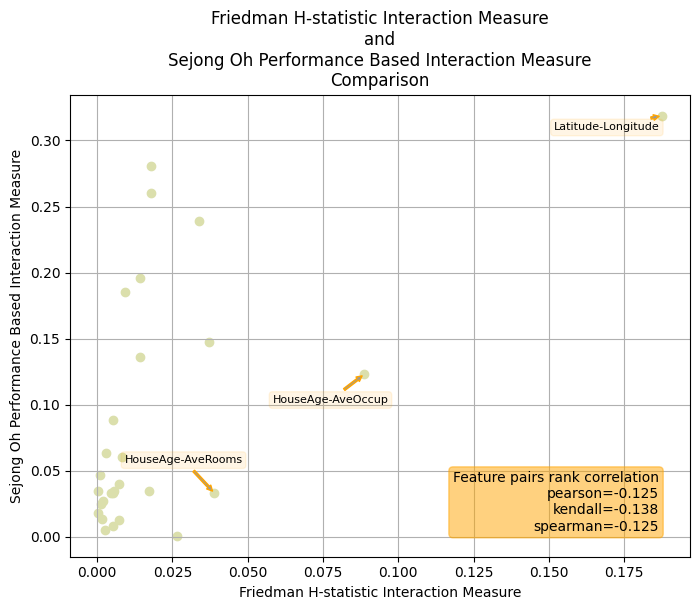

In [24]:
comparator = FeatureInteractionMethodComparator()
comparator.summary(h_stat, perf_based)

In [ ]:
cond = ConditionalMinimalDepthMethod()
cond.fit(model, X, show_progress=True) 

### Conditional Depth Method

In [25]:
from xgboost import XGBRegressor
model_gb = XGBRegressor(n_estimators=80, max_depth=4).fit(X, y)

In [26]:
split_score = SplitScoreMethod()
split_score.fit(model_gb, X, show_progress=True, interaction_selected_metric = "sum_gain")

100%|██████████| 80/80 [00:01<00:00, 73.07it/s]


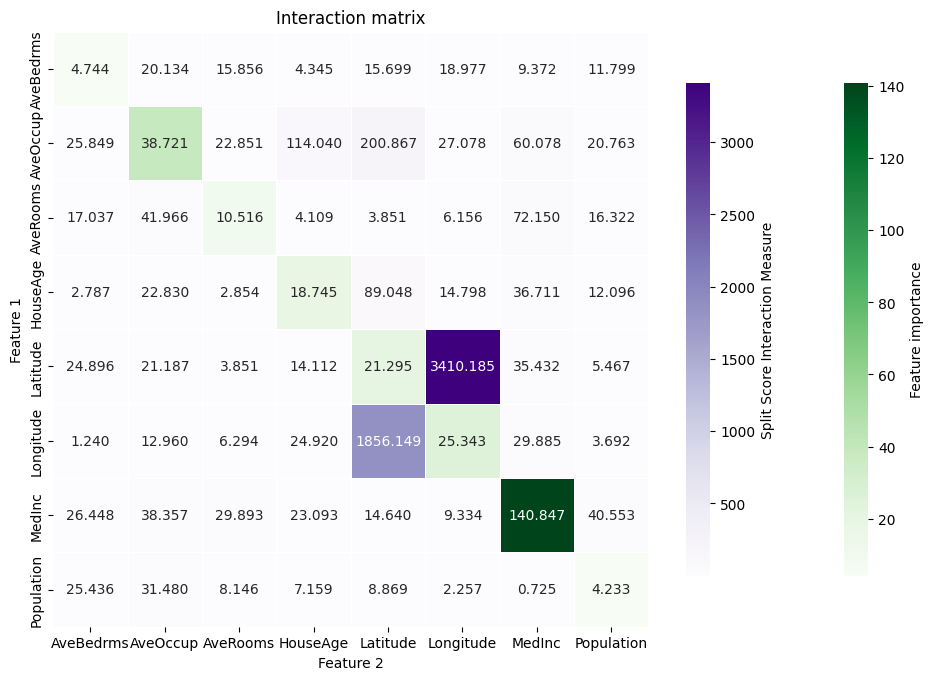

In [27]:
split_score.plot(figsize=(12, 8))

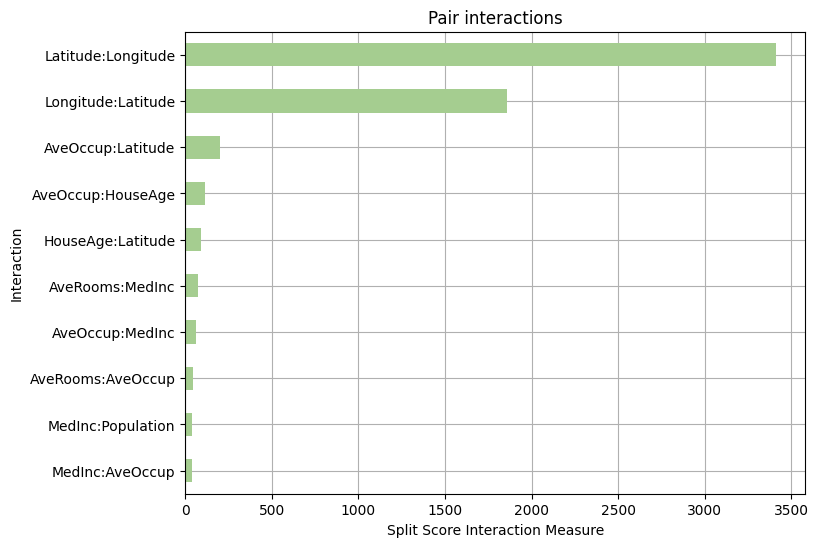

In [28]:
split_score.plot("bar_chart")